In [1]:
import pandas as pd
import datetime as dt
import numpy as np
import seaborn as sns
import os

1. Получить файл набора данных, прилагающийся к этой работе.

In [2]:
os.listdir()

['ПИ19_3_Деменчук_0.2.ipynb', 'Titanic.csv', '.ipynb_checkpoints']

2. Считать файл в pandas DataFrame

In [3]:
data = pd.read_csv('Titanic.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


### 3\. Ознакомиться с основными параметрами датасета, используя функции библиотеки pandas, включая следующие данные:

a. Количество точек данных (измерений) в наборе<br>
b. Количество полей данных (атрибутов)<br>
c. Тип данных каждого поля, шкала каждого поля<br>
d. Количество отсутствующих значений для каждого поля<br>
e. Количество и названия константных и уникальных полей<br>

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


a. Количество точек данных (измерений) в наборе

In [6]:
len(data.shape)

2

b. Количество полей данных (атрибутов)

In [7]:
data.shape[0]

891

In [8]:
data.shape[1]

12

c. Тип данных каждого поля, шкала каждого поля

In [9]:
types = data.dtypes
items = data.apply(lambda item: item.unique())
pd.concat([types, items], axis=1)

,0,1
PassengerId,int64,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."
Survived,int64,"[0, 1]"
Pclass,int64,"[3, 1, 2]"
Name,object,"[Braund, Mr. Owen Harris, Cumings, Mrs. John B..."
Sex,object,"[male, female]"
Age,float64,"[22.0, 38.0, 26.0, 35.0, nan, 54.0, 2.0, 27.0,..."
SibSp,int64,"[1, 0, 3, 4, 2, 5, 8]"
Parch,int64,"[0, 1, 2, 5, 3, 4, 6]"
Ticket,object,"[A/5 21171, PC 17599, STON/O2. 3101282, 113803..."
Fare,float64,"[7.25, 71.2833, 7.925, 53.1, 8.05, 8.4583, 51...."


d. Количество отсутствующих значений для каждого поля

In [10]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

e. Количество и названия константных и уникальных полей

In [11]:
def my_filter(item):
    return len(item) - len(item.unique()) == 0

data.apply(my_filter)

PassengerId     True
Survived       False
Pclass         False
Name            True
Sex            False
Age            False
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin          False
Embarked       False
dtype: bool

In [12]:
for column_name in data:
    print(column_name, len(data[column_name].unique()))

PassengerId 891
Survived 2
Pclass 3
Name 891
Sex 2
Age 89
SibSp 7
Parch 7
Ticket 681
Fare 248
Cabin 148
Embarked 4


### 4. Удалить из набора поля, не несущие информативной нагрузки - содержащие уникальные либо константные значения

In [13]:
data_backup = pd.DataFrame(data)
data.drop(columns=["PassengerId", "Name", "Ticket", "Cabin", "Fare"], axis=1, inplace=True)
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,male,22.0,1,0,S
1,1,1,female,38.0,1,0,C
2,1,3,female,26.0,0,0,S
3,1,1,female,35.0,1,0,S
4,0,3,male,35.0,0,0,S


### 5. Заменить возраст пассажиров на год рождения

In [14]:
data['birth_year'] = (1912 - data['Age'])
data.head()


,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,birth_year
0,0,3,male,22.0,1,0,S,1890.0
1,1,1,female,38.0,1,0,C,1874.0
2,1,3,female,26.0,0,0,S,1886.0
3,1,1,female,35.0,1,0,S,1877.0
4,0,3,male,35.0,0,0,S,1877.0


### 6. Переименовать все названия колонок на русском языке

In [15]:
rename_dict = {
    "PClass": "Класс пассажира",
    "birth_year": "Год рождения",
    "Sex": "Пол",
    "Survived": "Выживший",
    "Embarked" : "Порт посадки",
    "Pclass":"Класс пассажира",
    "SibSp": "Кол-во родственников 2 порядка",
    "Parch": "Кол-во родственников 1 порядка",
    "Age":"Возраст"
}
data = data.rename(columns=rename_dict)
data.head()

,Выживший,Класс пассажира,Пол,Возраст,Кол-во родственников 2 порядка,Кол-во родственников 1 порядка,Порт посадки,Год рождения
0,0,3,male,22.0,1,0,S,1890.0
1,1,1,female,38.0,1,0,C,1874.0
2,1,3,female,26.0,0,0,S,1886.0
3,1,1,female,35.0,1,0,S,1877.0
4,0,3,male,35.0,0,0,S,1877.0


### 7. Заменить все отсутствующие данные средним значением (в случае числового поля) либо самым распространенным в категориальных полях.

In [16]:
data.isna().sum()

Выживший                            0
Класс пассажира                     0
Пол                                 0
Возраст                           177
Кол-во родственников 2 порядка      0
Кол-во родственников 1 порядка      0
Порт посадки                        2
Год рождения                      177
dtype: int64

In [17]:
data['Класс пассажира'] = data['Класс пассажира'].fillna(data['Класс пассажира'].mode().item())
data['Год рождения'] = data['Год рождения'].fillna(data['Год рождения'].mode().item())
data['Порт посадки'] = data['Год рождения'].fillna(data['Порт посадки'].mode().item())
data['Возраст'] = data['Возраст'].fillna(data['Возраст'].mean().item())

In [18]:
data.isna().sum()

Выживший                          0
Класс пассажира                   0
Пол                               0
Возраст                           0
Кол-во родственников 2 порядка    0
Кол-во родственников 1 порядка    0
Порт посадки                      0
Год рождения                      0
dtype: int64

### 8. Вывести Гистограмму распределения выживших по возрасту

<AxesSubplot:xlabel='Возраст', ylabel='Count'>

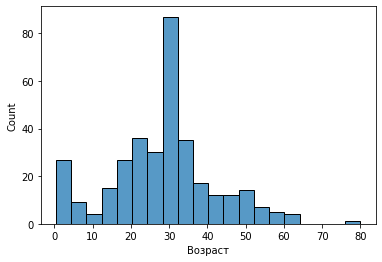

In [19]:
mask = data['Выживший'] == 1
df = data[mask]
sns.histplot(df['Возраст'])

### 9. Вывести гистограмму распределения выживших по возрасту и классу (Pclass)

<AxesSubplot:xlabel='Возраст', ylabel='Count'>

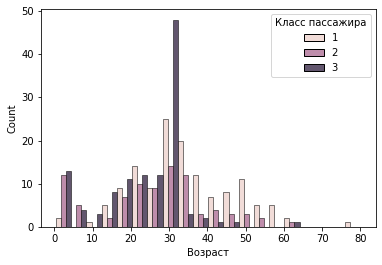

In [20]:
sns.histplot(x=df["Возраст"], hue=df["Класс пассажира"], multiple="dodge")

### 10. Гистограмма распределения выживших по полу человека

<AxesSubplot:xlabel='Пол', ylabel='Count'>

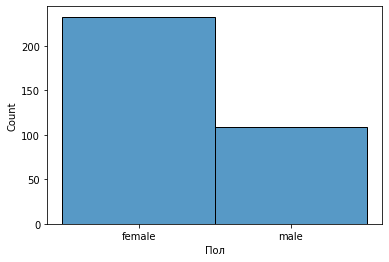

In [21]:
sns.histplot(df["Пол"])

### 11. Вывести титулы в отдельную колонку, убрать самые редкие из них

In [22]:
data["Имя"] = data_backup["Name"]

In [23]:
data["Титул"] = data["Имя"].str.split(", ")
data["Титул"] = data["Титул"].str[0]
data

,Выживший,Класс пассажира,Пол,Возраст,Кол-во родственников 2 порядка,Кол-во родственников 1 порядка,Порт посадки,Год рождения,Имя,Титул
0,0,3,male,22.000000,1,0,1890.0,1890.0,"Braund, Mr. Owen Harris",Braund
1,1,1,female,38.000000,1,0,1874.0,1874.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Cumings
2,1,3,female,26.000000,0,0,1886.0,1886.0,"Heikkinen, Miss. Laina",Heikkinen
3,1,1,female,35.000000,1,0,1877.0,1877.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Futrelle
4,0,3,male,35.000000,0,0,1877.0,1877.0,"Allen, Mr. William Henry",Allen
...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,1885.0,1885.0,"Montvila, Rev. Juozas",Montvila
887,1,1,female,19.000000,0,0,1893.0,1893.0,"Graham, Miss. Margaret Edith",Graham
888,0,3,female,29.699118,1,2,1888.0,1888.0,"Johnston, Miss. Catherine Helen ""Carrie""",Johnston
889,1,1,male,26.000000,0,0,1886.0,1886.0,"Behr, Mr. Karl Howell",Behr


In [24]:
title_names = data["Титул"].value_counts().to_dict()
title_names= {key:value for key, value in title_names.items() if value > 1}
title_names

{'Andersson': 9,
 'Sage': 7,
 'Panula': 6,
 'Skoog': 6,
 'Carter': 6,
 'Goodwin': 6,
 'Johnson': 6,
 'Rice': 5,
 'Lefebre': 4,
 'Asplund': 4,
 'Harris': 4,
 'Fortune': 4,
 'Baclini': 4,
 'Brown': 4,
 'Hart': 4,
 'Kelly': 4,
 'Harper': 4,
 'Smith': 4,
 'Gustafsson': 4,
 'Palsson': 4,
 'Williams': 4,
 'Ford': 4,
 'Johansson': 3,
 'Davies': 3,
 'Jussila': 3,
 'Flynn': 3,
 'Hickman': 3,
 'Thayer': 3,
 'West': 3,
 'Laroche': 3,
 'Bourke': 3,
 'Boulos': 3,
 'Navratil': 3,
 'Richards': 3,
 'Elias': 3,
 "O'Brien": 3,
 'Van Impe': 3,
 'Olsen': 3,
 'Goldsmith': 3,
 'Graham': 3,
 'Moran': 3,
 'Newell': 3,
 'Collyer': 3,
 'Vander Planke': 3,
 'Hoyt': 3,
 'Meyer': 3,
 'Allison': 3,
 'Taussig': 3,
 'Hansen': 3,
 'Jensen': 3,
 'Andrews': 2,
 'Moor': 2,
 'Rosblom': 2,
 'Pears': 2,
 'Lobb': 2,
 'Hakkarainen': 2,
 'Olsson': 2,
 'Beckwith': 2,
 'Abbott': 2,
 'Penasco y Castellana': 2,
 'Carlsson': 2,
 'Barbara': 2,
 'Duff Gordon': 2,
 'Webber': 2,
 'Baxter': 2,
 'Attalah': 2,
 'Mellinger': 2,
 'Beane': 2

In [25]:
def new_data_performer(item):
    if item["Титул"] not in title_names:
        item["Редкий_Титул"] = True
    else:
        item["Редкий_Титул"] = False
    return item

data = data.apply(new_data_performer, axis=1)

In [26]:
data[data["Редкий_Титул"] == False]

,Выживший,Класс пассажира,Пол,Возраст,Кол-во родственников 2 порядка,Кол-во родственников 1 порядка,Порт посадки,Год рождения,Имя,Титул,Редкий_Титул
0,0,3,male,22.000000,1,0,1890.0,1890.0,"Braund, Mr. Owen Harris",Braund,False
3,1,1,female,35.000000,1,0,1877.0,1877.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Futrelle,False
4,0,3,male,35.000000,0,0,1877.0,1877.0,"Allen, Mr. William Henry",Allen,False
5,0,3,male,29.699118,0,0,1888.0,1888.0,"Moran, Mr. James",Moran,False
7,0,3,male,2.000000,3,1,1910.0,1910.0,"Palsson, Master. Gosta Leonard",Palsson,False
...,...,...,...,...,...,...,...,...,...,...,...
876,0,3,male,20.000000,0,0,1892.0,1892.0,"Gustafsson, Mr. Alfred Ossian",Gustafsson,False
877,0,3,male,19.000000,0,0,1893.0,1893.0,"Petroff, Mr. Nedelio",Petroff,False
885,0,3,female,39.000000,0,5,1873.0,1873.0,"Rice, Mrs. William (Margaret Norton)",Rice,False
887,1,1,female,19.000000,0,0,1893.0,1893.0,"Graham, Miss. Margaret Edith",Graham,False
